Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
base_path = "/content/gdrive/My\ Drive/Colab\ Notebooks/upGrad"

In [ ]:
!ls {base_path}

data  melanoma.ipynb


In [ ]:
# !mkdir {base_path}/data

In [ ]:
!ls {base_path}/data

 CNN_assignment.zip
'Skin cancer ISIC The International Skin Imaging Collaboration'


In [ ]:
# !unzip {base_path}/data/CNN_assignment.zip

Archive:  /content/gdrive/My Drive/Colab Notebooks/upGrad/data/CNN_assignment.zip
replace Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
data_base_path = os.path.join(base_path, "data", "Skin\ cancer\ ISIC\ The\ International\ Skin\ Imaging\ Collaboration")
data_base_path

'/content/gdrive/My\\ Drive/Colab\\ Notebooks/upGrad/data/Skin\\ cancer\\ ISIC\\ The\\ International\\ Skin\\ Imaging\\ Collaboration'

In [ ]:
!ls {data_base_path}

Test  Train


In [ ]:
!ls {os.path.join(data_base_path, "Train")}

'actinic keratosis'	 melanoma		      'seborrheic keratosis'
'basal cell carcinoma'	 nevus			      'squamous cell carcinoma'
 dermatofibroma		'pigmented benign keratosis'  'vascular lesion'


In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(os.path.join(data_base_path, "Train").replace('\\', ''))
data_dir_test = pathlib.Path(os.path.join(data_base_path, "Test").replace('\\', ''))

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
seed = 123

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=seed,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_test,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=seed,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 118 files belonging to 9 classes.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)
print("Number of classes: " , num_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Number of classes:  9


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

def display_classes(dataset):
  is_class_disp = [0] * len(class_names)

  plt.figure(figsize=(10, 10))

  i = 0
  for images, labels in dataset:  
    while i < 9:

      for j in range(batch_size):

        if not is_class_disp[tf.argmax(labels[j])]:
          if i>=9: break
          ax = plt.subplot(3, 3, i + 1)
          plt.imshow(images[j].numpy().astype("uint8"))
          plt.title(class_names[tf.argmax(labels[j])])
          plt.axis("off")
          i += 1
          is_class_disp[tf.argmax(labels[j])] = 1
          
      if i>=9: break
    if i>=9: break

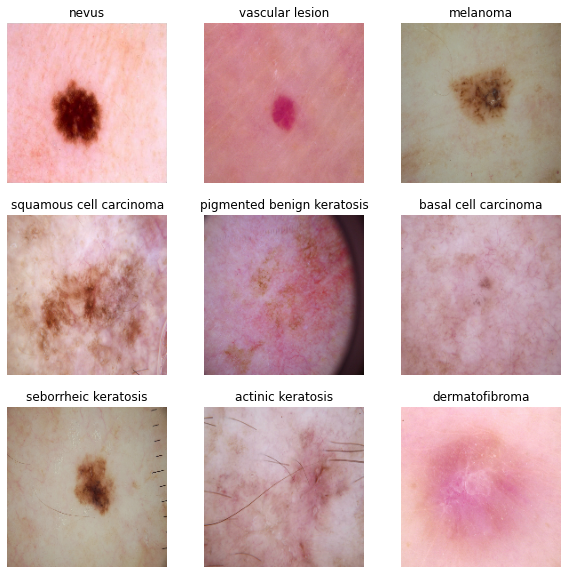

In [ ]:
# training images for each of the category
display_classes(train_ds)

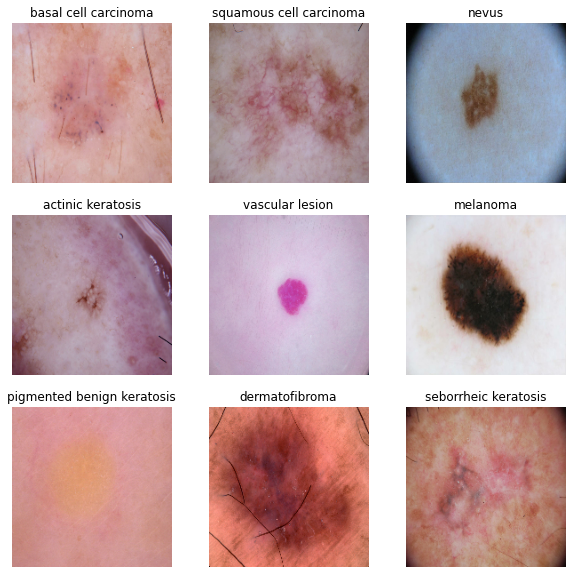

In [ ]:
# validation images for each of the category
display_classes(val_ds)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [ ]:
def cnn(input, feature_maps, filter_size, padding='same', stride=1):
  "To get a CNN layer with Relu activation and Batch normalization"
  conv = Conv2D(feature_maps, (filter_size, filter_size), padding=padding, strides=stride,
                activation='relu')(input)
  bn = BatchNormalization()(conv)
  return bn

def cnn_block(input, feature_maps, filter_size, padding='same', stride=1, dropout=None):
  "To get CNN blocks with 2 CNN layers followed by MaxPooling layer and finally dropout layer."
  cnn1 = cnn(input, feature_maps, filter_size, padding, stride)
  cnn2 = cnn(cnn1, feature_maps, filter_size, padding, stride)
  cnn2 = MaxPooling2D(pool_size=(2, 2))(cnn2)
  if dropout: cnn2 = Dropout(rate=dropout)(cnn2)
  return cnn2

In [ ]:
### Your code goes here

# shape of the input data
input_shape = (img_height, img_width, 3)

# Create a model and train it on the augmented image data
inputs = keras.Input(shape=input_shape)
x = layers.Rescaling(1.0 / 255)(inputs)  # Rescale inputs

# 1st CNN block
cnn_block1 = cnn_block(x, feature_maps=32, filter_size=3, padding='same', stride=1)
# 2nd CNN block
cnn_block2 = cnn_block(cnn_block1, feature_maps=64, filter_size=3, padding='same', stride=1)
# 3rd CNN block
cnn_block3 = cnn_block(cnn_block2, feature_maps=128, filter_size=3, padding='same', stride=1)

cnn_flatten = Flatten()(cnn_block3)
dense1 = Dense(4096, activation='relu')(cnn_flatten)
dense2 = Dense(2048, activation='relu')(dense1)
dense3 = Dense(1024, activation='relu')(dense2)

output = Dense(num_classes, activation='softmax')(dense3)

model = keras.Model(inputs, output)

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_19 (Bat  (None, 180, 180, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 batch_normalization_20 (Bat  (None, 180, 180, 32)     128       
 chNormalization)                                          

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 13s 171ms/step - loss: 11.5793 - accuracy: 0.3180 - val_loss: 3.5336 - val_accuracy: 0.1271
Epoch 2/20
70/70 [==============================] - 11s 158ms/step - loss: 1.5810 - accuracy: 0.4556 - val_loss: 6.6809 - val_accuracy: 0.0424
Epoch 3/20
70/70 [==============================] - 11s 158ms/step - loss: 1.3735 - accuracy: 0.5279 - val_loss: 8.2653 - val_accuracy: 0.0678
Epoch 4/20
70/70 [==============================] - 11s 159ms/step - loss: 1.2236 - accuracy: 0.5793 - val_loss: 5.2546 - val_accuracy: 0.0932
Epoch 5/20
70/70 [==============================] - 11s 159ms/step - loss: 1.0261 - accuracy: 0.6297 - val_loss: 4.4452 - val_accuracy: 0.1186
Epoch 6/20
70/70 [==============================] - 11s 159ms/step - loss: 0.9253 - accuracy: 0.6623 - val_loss: 3.2857 - val_accuracy: 0.2203
Epoch 7/20
70/70 [==============================] - 11s 159ms/step - loss: 0.8391 - accuracy: 0.7097 - val_loss: 4.8584 - val_accuracy: 0.237

### Visualizing training results

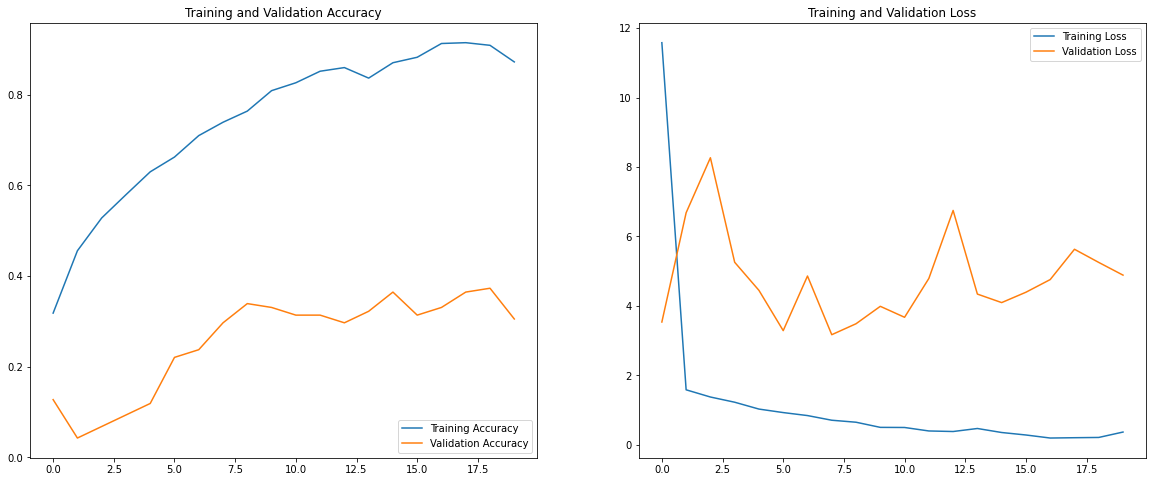

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### **Findings:**
+ Training accuracy is over 87%, while Validation is just 30%, which clearly indicates model is overfitted
+ Also, Training loss is much lower as compared to Testing loss

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# data augmentation layer to flip and rotate images randomly
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

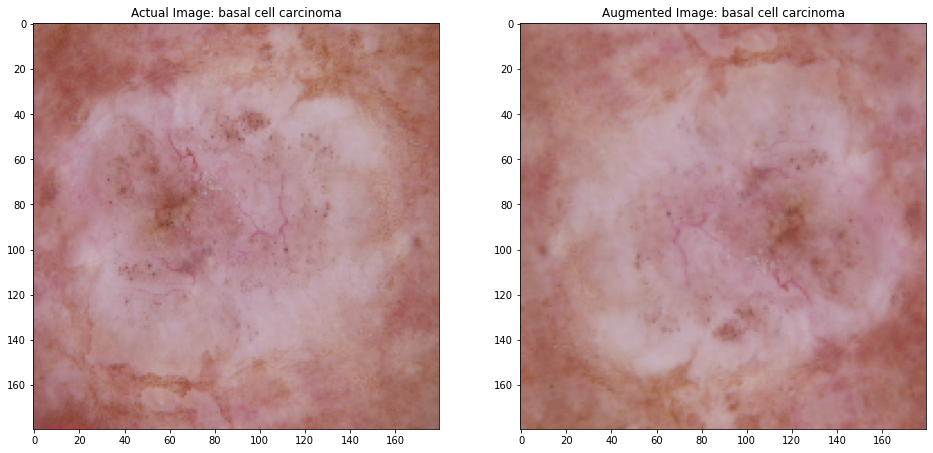

In [ ]:
# Visualize how your augmentation strategy works for one instance of training image.
image, label = next(iter(train_ds))

fig = plt.figure(figsize=(16, 8))

ax = plt.subplot(1, 2, 1)
plt.imshow(image[0].numpy().astype("uint8"))
plt.title("Actual Image: " + class_names[tf.argmax(label[0])])

ax = plt.subplot(1, 2, 2)
image = data_augmentation(tf.cast(image[0], tf.float32))
plt.imshow(image.numpy().astype("uint8"))
plt.title("Augmented Image: " + class_names[tf.argmax(label[0])])
plt.show()

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
### Your code goes here

# shape of the input data
input_shape = (img_height, img_width, 3)

# Create a model and train it on the augmented image data
inputs = keras.Input(shape=input_shape)
x = layers.Rescaling(1.0 / 255)(inputs)  # Rescale inputs
x = data_augmentation(x) # augment data

# 1st CNN block
cnn_block1 = cnn_block(x, feature_maps=32, filter_size=3, padding='same', stride=1, dropout=0.2)
# 2nd CNN block
cnn_block2 = cnn_block(cnn_block1, feature_maps=64, filter_size=3, padding='same', stride=1, dropout=0.2)
# 3rd CNN block
cnn_block3 = cnn_block(cnn_block2, feature_maps=128, filter_size=3, padding='same', stride=1, dropout=0.2)

cnn_flatten = Flatten()(cnn_block3)
dense1 = Dense(4096, activation='relu')(cnn_flatten)
dense1 = Dropout(rate=0.2)(dense1)

dense2 = Dense(2048, activation='relu')(dense1)
dense1 = Dropout(rate=0.2)(dense2)

dense3 = Dense(1024, activation='relu')(dense2)
dense3 = Dropout(rate=0.2)(dense3)

output = Dense(num_classes, activation='softmax')(dense3)

model = keras.Model(inputs, output)

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (180, 180, 3)             0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                             

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 49s 498ms/step - loss: 19.8282 - accuracy: 0.2765 - val_loss: 4.0901 - val_accuracy: 0.1356
Epoch 2/20
70/70 [==============================] - 12s 173ms/step - loss: 1.8963 - accuracy: 0.3595 - val_loss: 4.4558 - val_accuracy: 0.0424
Epoch 3/20
70/70 [==============================] - 12s 175ms/step - loss: 1.7106 - accuracy: 0.3935 - val_loss: 3.5231 - val_accuracy: 0.1441
Epoch 4/20
70/70 [==============================] - 12s 173ms/step - loss: 1.5741 - accuracy: 0.4390 - val_loss: 5.9676 - val_accuracy: 0.1271
Epoch 5/20
70/70 [==============================] - 12s 171ms/step - loss: 1.5124 - accuracy: 0.4792 - val_loss: 49.3177 - val_accuracy: 0.0508
Epoch 6/20
70/70 [==============================] - 12s 173ms/step - loss: 1.4109 - accuracy: 0.4891 - val_loss: 41.8971 - val_accuracy: 0.0847
Epoch 7/20
70/70 [==============================] - 12s 171ms/step - loss: 1.4033 - accuracy: 0.4931 - val_loss: 20.7737 - val_accuracy: 0.

### Visualizing the results

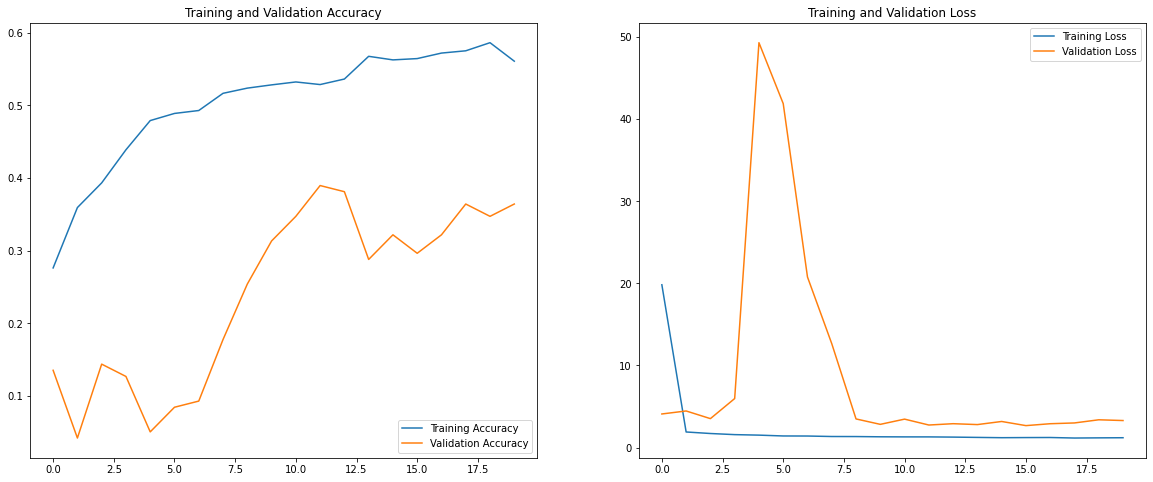

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### **Findings:**
+ Earlier the model was overfitting. The training accuracy was very high 87% while the Validation accuracy was only 30%
+ With drouput the model is underfitted, but the problem of overfitting has been resolved as compared to before Training accuracy is 56%, while Validation is 36%.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
# to get the labels and get the frequency of the labels/class names
labels = np.array([])

for image, label in train_ds:
  labels = np.concatenate([labels, tf.argmax(label, axis=-1).numpy()])

labels = [class_names[int(label)] for label in labels]

# get the normalize frequency of the labels
pd.Series(labels).value_counts(normalize=True)

pigmented benign keratosis    0.206342
melanoma                      0.195623
basal cell carcinoma          0.167932
nevus                         0.159446
squamous cell carcinoma       0.080840
vascular lesion               0.062081
actinic keratosis             0.050916
dermatofibroma                0.042430
seborrheic keratosis          0.034390
dtype: float64

In [ ]:
# get the frequency of the labels
pd.Series(labels).value_counts(normalize=False)

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?

### **Findings:**
+ Class - "seborrheic keratosis" has the least number of samples 3.4% or 77 samples

+ Class - "pigmented benign keratosis" has the highest number of samples 20.6% or 462 samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset = data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset, i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/upGrad/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE893CD9E10>: 100%|██████████| 500/500 [00:17<00:00, 28.63 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/upGrad/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE7FE41A2D0>: 100%|██████████| 500/500 [00:17<00:00, 28.08 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/upGrad/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE893C31E90>: 100%|██████████| 500/500 [00:18<00:00, 27.29 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/upGrad/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FE7FE4C2E50>: 100%|██████████| 500/500 [01:31<00:00,  5.47 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/upGrad/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE893CC2550>: 100%|██████████| 500/500 [01:22<00:00,  6.08 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/upGrad/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE80305AFD0>: 100%|██████████| 500/500 [00:17<00:00, 27.87 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/upGrad/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE7FE089990>: 100%|██████████| 500/500 [00:40<00:00, 12.33 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/upGrad/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE893D3A210>: 100%|██████████| 500/500 [00:18<00:00, 27.48 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/upGrad/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE7FE4C5E90>: 100%|██████████| 500/500 [00:18<00:00, 27.49 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
import glob

In [ ]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[:2]

['/content/gdrive/My Drive/Colab Notebooks/upGrad/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0027626.jpg_1a1cb907-38c5-4588-a2d2-38a379cbd02d.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/upGrad/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0031344.jpg_3c7fabdc-e700-4305-8856-5eaa912ec52e.jpg']

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:5]

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma']

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path','Label'])

In [ ]:
df2['Label'].value_counts()

dermatofibroma                500
actinic keratosis             500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
basal cell carcinoma          500
melanoma                      500
vascular lesion               500
squamous cell carcinoma       500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train = data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  labels='inferred',
  label_mode='categorical',
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  labels='inferred',
  label_mode='categorical',
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
### Your code goes here

# shape of the input data
input_shape = (img_height, img_width, 3)

# Create a model and train it on the augmented image data
inputs = keras.Input(shape=input_shape)
x = layers.Rescaling(1.0 / 255)(inputs)  # Rescale inputs

# 1st CNN block
cnn_block1 = cnn_block(x, feature_maps=32, filter_size=3, padding='same', stride=1, dropout=0.2)
cnn_block2 = cnn_block(cnn_block1, feature_maps=64, filter_size=3, padding='same', stride=1, dropout=0.2)
cnn_block3 = cnn_block(cnn_block2, feature_maps=128, filter_size=3, padding='same', stride=1, dropout=0.2)

cnn_flatten = Flatten()(cnn_block3)
dense1 = Dense(4096, activation='relu')(cnn_flatten)
dense1 = Dropout(rate=0.2)(dense1)

dense2 = Dense(2048, activation='relu')(dense1)
dense1 = Dropout(rate=0.2)(dense2)

dense3 = Dense(1024, activation='relu')(dense2)
dense3 = Dropout(rate=0.2)(dense3)

output = Dense(num_classes, activation='softmax')(dense3)

model = keras.Model(inputs, output)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_18 (Bat  (None, 180, 180, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 batch_normalization_19 (Bat  (None, 180, 180, 32)     128       
 chNormalization)                                          

#### **Todo:**  Train your model

In [ ]:
for x, y in train_ds:
  print(x.shape, y.shape)
  break

(32, 180, 180, 3) (32, 9)


In [ ]:
for x, y in val_ds:
  print(x.shape, y.shape)
  break

(32, 180, 180, 3) (32, 9)


In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 40s 226ms/step - loss: 8.3433 - accuracy: 0.2828 - val_loss: 3.9513 - val_accuracy: 0.1151
Epoch 2/30
169/169 [==============================] - 40s 230ms/step - loss: 1.5471 - accuracy: 0.4279 - val_loss: 4.1585 - val_accuracy: 0.1203
Epoch 3/30
169/169 [==============================] - 38s 217ms/step - loss: 1.3145 - accuracy: 0.5180 - val_loss: 5.6253 - val_accuracy: 0.4091
Epoch 4/30
169/169 [==============================] - 37s 216ms/step - loss: 1.1464 - accuracy: 0.5792 - val_loss: 1.4023 - val_accuracy: 0.5479
Epoch 5/30
169/169 [==============================] - 38s 216ms/step - loss: 1.0464 - accuracy: 0.6163 - val_loss: 1.2342 - val_accuracy: 0.5924
Epoch 6/30
169/169 [==============================] - 39s 224ms/step - loss: 0.9165 - accuracy: 0.6712 - val_loss: 1.1003 - val_accuracy: 0.6192
Epoch 7/30
169/169 [==============================] - 37s 216ms/step - loss: 0.8538 - accuracy: 0.6986 - val_loss: 1.1704 - val_ac

#### **Todo:**  Visualize the model results

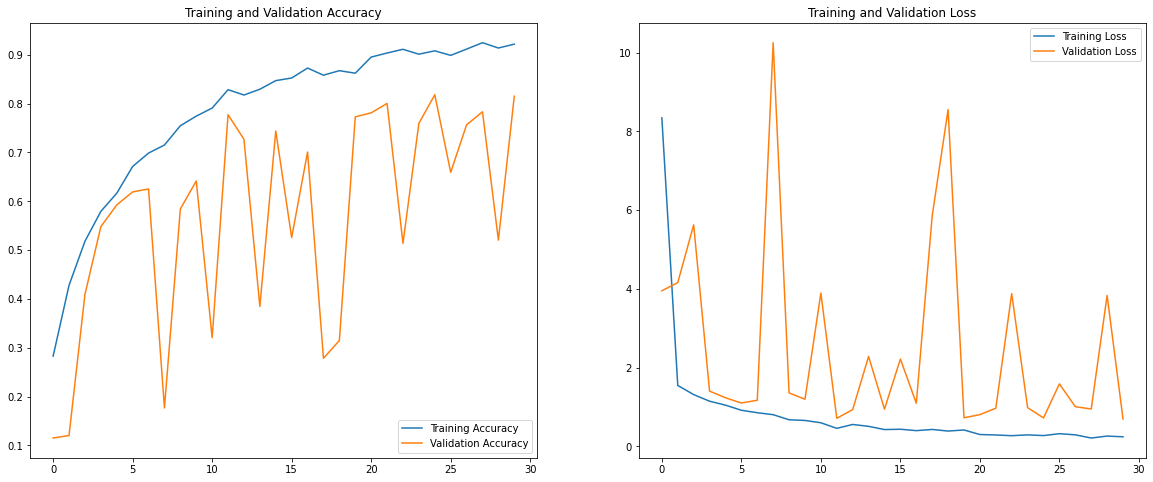

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Check accuracy of all the classes

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# checking the accuracy of all the classes
labels = np.array([])
predictions = np.array([])

for image, label in train_ds:
  labels = np.concatenate([labels, tf.argmax(label, axis=-1).numpy()])
  predictions = np.concatenate([predictions, tf.argmax(model.predict(image), axis=-1).numpy()])

labels = [class_names[int(label)] for label in labels]
predictions = [class_names[int(label)] for label in predictions]

print(classification_report(labels, predictions))

                            precision    recall  f1-score   support

         actinic keratosis       0.96      0.56      0.71       493
      basal cell carcinoma       0.98      0.98      0.98       721
            dermatofibroma       0.96      1.00      0.98       455
                  melanoma       0.99      0.81      0.89       755
                     nevus       0.74      0.97      0.84       677
pigmented benign keratosis       0.98      0.98      0.98       773
      seborrheic keratosis       0.79      0.99      0.88       456
   squamous cell carcinoma       0.99      0.96      0.98       569
           vascular lesion       0.98      0.99      0.99       493

                  accuracy                           0.92      5392
                 macro avg       0.93      0.92      0.91      5392
              weighted avg       0.93      0.92      0.92      5392



#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

### **Findings:**

#### Model fitness related
+ Augmentation definitely helped with the solving for both underfitting and overfitting
+ The final Train accuracy is 92% while the Validation accuracy is 81%
+ So, the model is still overfitting, but compared to before augmentataion it is much better
+ Also, we observe that the Validation accuracy curve is not smooth. For some epochs accuracy is very poor while for some it is very good. This is likely to be due to the constant/fixed learning rate, if we decline the learning rate with the increase in epochs, we might be able to get smoother validation curve.

#### Class wise accuracy results
+ All the classes have F1 score greater than 80%, except for class - "actinic keratosis"
+ Class - "melanoma" has 99% precision (indicating model is correct 99% of the times when it predicts Melanoma cancer) & 81% recall (indicating model is able to capture/predict only 81% of all the actual cancer cases.